## Importing Libraries

In [0]:
import numpy as np
from PIL import Image

## Importing VGG16 ConvNET

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

## Intantiating our Classifier

In [5]:
classifier = VGG16(weights = 'imagenet', include_top = True)

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 13s 0us/step


## Getting all Layers

In [0]:
layers = dict([(layer.name, layer.output) for layer in classifier.layers])

In [7]:
layers

{'block1_conv1': <tf.Tensor 'block1_conv1/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_conv2': <tf.Tensor 'block1_conv2/Relu:0' shape=(?, 224, 224, 64) dtype=float32>,
 'block1_pool': <tf.Tensor 'block1_pool/MaxPool:0' shape=(?, 112, 112, 64) dtype=float32>,
 'block2_conv1': <tf.Tensor 'block2_conv1/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_conv2': <tf.Tensor 'block2_conv2/Relu:0' shape=(?, 112, 112, 128) dtype=float32>,
 'block2_pool': <tf.Tensor 'block2_pool/MaxPool:0' shape=(?, 56, 56, 128) dtype=float32>,
 'block3_conv1': <tf.Tensor 'block3_conv1/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv2': <tf.Tensor 'block3_conv2/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_conv3': <tf.Tensor 'block3_conv3/Relu:0' shape=(?, 56, 56, 256) dtype=float32>,
 'block3_pool': <tf.Tensor 'block3_pool/MaxPool:0' shape=(?, 28, 28, 256) dtype=float32>,
 'block4_conv1': <tf.Tensor 'block4_conv1/Relu:0' shape=(?, 28, 28, 512) dtype=float32>,
 'block4_co

In [8]:
classifier.count_params()

138357544

## Opening Image and Processing it

In [0]:
image_path = '/Duckbilled_platypus.jpg'
image = Image.open(image_path)
image = image.resize((224,224))

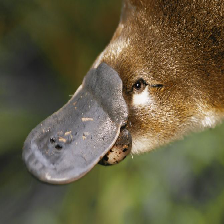

In [24]:
image

## Converting Image into an Numpy array

In [0]:
x = np.asarray(image, dtype='float32')
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

## Predicting Results

In [26]:
preds = classifier.predict(x)
print('Predicted: ', decode_predictions(preds, top = 3)[0])

Predicted:  [('n01873310', 'platypus', 0.999928), ('n02444819', 'otter', 2.6990576e-05), ('n01601694', 'water_ouzel', 1.7148941e-05)]


# It's a Platypus!